In [1]:
# for reading the Excel data
import pandas as pd 

In [2]:
#Reading the data 
df = pd.read_excel("HR Data.xlsx")
df.head() # displaying first 5 rows and cols

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [3]:
df.shape # checking size of the data

(1470, 39)

In [4]:
df.isnull().any().sum() # checking the data has any null values 

0

In [5]:
 # checking the data has any duplicated values
duplicate_rows = df[df.duplicated()]
duplicate_rows 

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager


In [27]:
#checking the columns names
print(df.columns)


Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

# Now you can calculate the correlation matrix
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                            Attrition  Business Travel  CF_age band  \
Attrition                    1.000000         0.000074     0.047772   
Business Travel              0.000074         1.000000     0.023246   
CF_age band                  0.047772         0.023246     1.000000   
CF_attrition label           1.000000         0.000074     0.047772   
Department                   0.063991        -0.009044    -0.026124   
Education Field              0.026846         0.023724     0.035293   
emp no                      -0.013560         0.025039    -0.029543   
Employee Number             -0.010369        -0.015810    -0.026281   
Gender                       0.029453        -0.032981    -0.010884   
Job Role                     0.067151         0.002724    -0.051762   
Marital Status               0.162070         0.024001     0.066824   
Over Time                    0.246118         0.016543     0.050031   
Over18                            NaN              NaN          NaN   
Traini

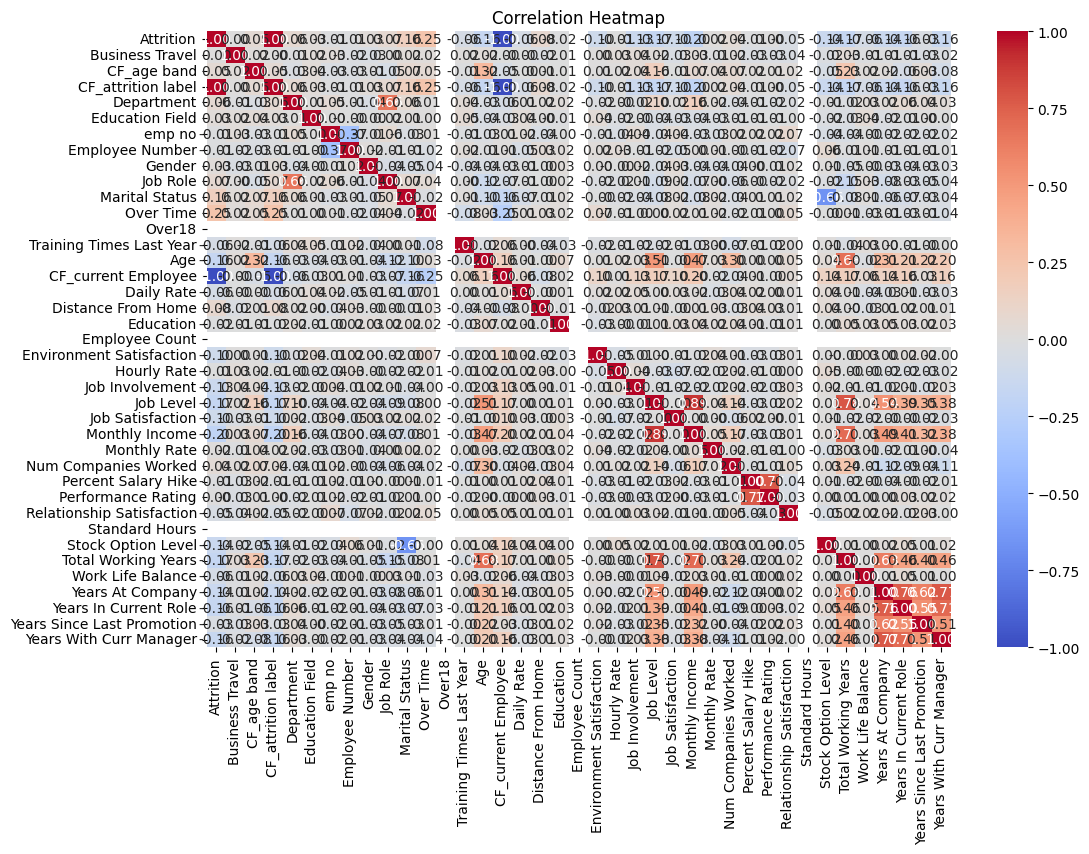

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

# Now you can calculate the correlation matrix
correlation_matrix = df_encoded.corr()


# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
print(X)
print(y)


      Business Travel  CF_age band  CF_attrition label  Department  \
0                   2            1                   1           2   
1                   1            2                   0           1   
2                   2            1                   1           1   
3                   1            0                   0           1   
4                   2            0                   0           1   
...               ...          ...                 ...         ...   
1465                0            0                   1           1   
1466                1            0                   1           1   
1467                1            1                   1           2   
1468                2            4                   1           1   
1469                2            4                   1           2   

      Education Field  emp no  Employee Number  Gender  Job Role  \
0                   1       0                0       0         7   
1                   1  

In [12]:
# Calculate VIF for each independent variable
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\Sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                      Variable        VIF
0              Business Travel   1.016204
1                  CF_age band   1.232408
2           CF_attrition label  13.228783
3                   Department   1.990166
4              Education Field   1.018268
5                       emp no   1.186769
6              Employee Number   1.178795
7                       Gender   1.023883
8                     Job Role   1.911475
9               Marital Status   1.876375
10                   Over Time   1.119405
11                      Over18        NaN
12    Training Times Last Year   1.028135
13                         Age   2.146843
14         CF_current Employee  69.361796
15                  Daily Rate   1.028042
16          Distance From Home   1.021648
17                   Education   1.023999
18              Employee Count        NaN
19    Environment Satisfaction   1.040925
20                 Hourly Rate   1.021668
21             Job Involvement   1.043788
22                   Job Level   6

In [13]:
# Filter VIF data for independent variables where VIF > 5
high_vif_data= vif_data[vif_data['VIF'] > 5]


# Print high VIF data for independent variables
print("Variables with VIF > 5 (Independent Variables):")
print(high_vif_data)

Variables with VIF > 5 (Independent Variables):
               Variable        VIF
2    CF_attrition label  13.228783
14  CF_current Employee  69.361796
22            Job Level   6.930499
24       Monthly Income   5.686430


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#calculating Attrition_count
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,count
Attrition,
No,1233
Yes,237


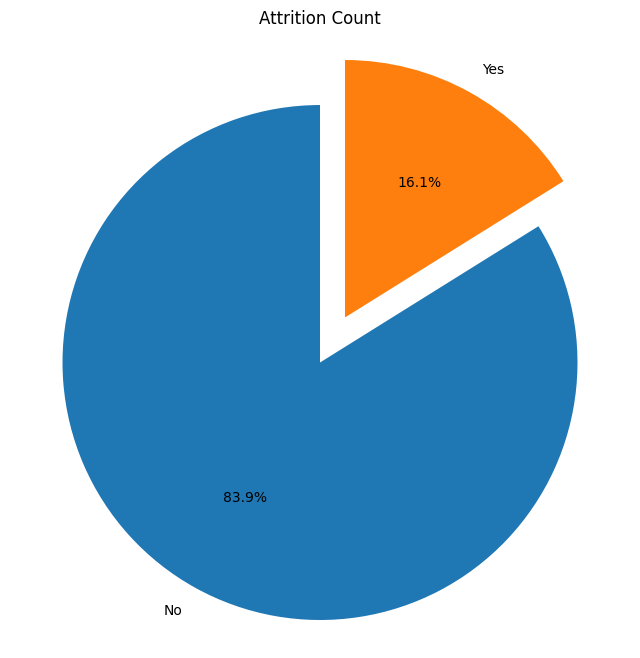

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

attrition_count = df['Attrition'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_count, labels=['No', 'Yes'], explode=(0.2, 0), autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Attrition Count')
plt.show()


<AxesSubplot: xlabel='count', ylabel='Attrition'>

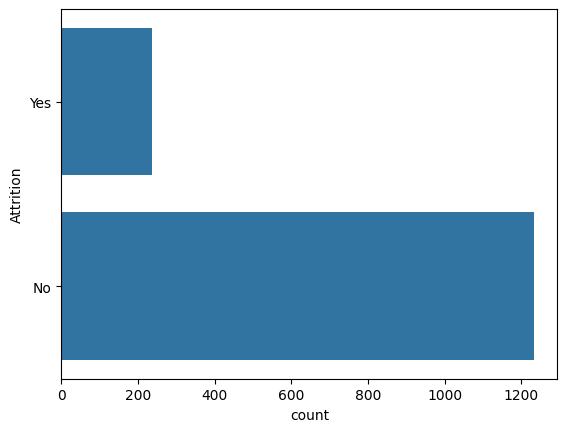

In [25]:
#Bar graph for Attrition
sns.countplot(df['Attrition'])